Quick start 1: How do I build *OmniPath* data with *pypath*?
========================================================
``pypath`` provides an easy way to build the OmniPath network as it has been described in our paper. At the first time this will take several minutes, because all data will be downloaded from the original providers. Next time pypath will use the data from its cache directory, so the network will build much faster. If you want to load it even faster, you can save it into a pickle dump.

In [ ]:
import pypath

pa = pypath.PyPath()
pa.load_omnipath()

Quick start 2: I just want a network quickly and play around with *pypath*
============================================================================
You can find the predefined formats in the ``pypath.data_formats`` module. For example, to load one resource from there, let's say Signor:

In [ ]:
import pypath
pa = pypath.PyPath()
pa.load_resources({'signor': pypath.data_formats.pathway['signor']})

Or to load all *process description* resources:

In [ ]:
import pypath
pa = pypath.PyPath()
pa.init_network(pypath.data_formats.pathway)

Quick start 3: How do I build networks from any data with *pypath*?
=================================================================
Here we show how to build a network from your own files. The advantage of building network with pypath is that you don't need to worry about merging redundant elements, neither about different formats and identifiers. Let's say you have two files with network data:

**network1.csv**

    entrezA,entrezB,effect
    1950,1956,inhibition
    5290,207,stimulation
    207,2932,inhibition
    1956,5290,stimulation

**network2.sif**

    EGF + EGFR
    EGFR + PIK3CA
    EGFR + SOS1
    PIK3CA + RAC1
    RAC1 + MAP3K1
    SOS1 + HRAS
    HRAS + MAP3K1
    PIK3CA + AKT1
    AKT1 - GSK3B
    
*Note: you need to create these files in order to load them.*

1: Defining input formats
-------------------------

In [1]:
import pypath
import pypath.input_formats as input_formats

input1 = input_formats.ReadSettings(
    name = 'egf1',
    inFile = 'network1.csv',
    header = True,
    separator = ',',
    nameColA = 0,
    nameColB = 1,
    nameTypeA = 'entrez',
    nameTypeB = 'entrez',
    sign = (2, 'stimulation', 'inhibition')
)

input2 = input_formats.ReadSettings(
    name = 'egf2',
    inFile = 'network2.sif',
    separator = ' ',
    nameColA = 0,
    nameColB = 2,
    nameTypeA = 'genesymbol',
    nameTypeB = 'genesymbol',
    sign = (1, '+', '-')
)

2: Creating PyPath object and loading the 2 test files
------------------------------------------------------

In [2]:
inputs = {
    'egf1': input1,
    'egf2': input2
}

pa = pypath.PyPath()
pa.reload()
pa.init_network(lst = inputs)



	=== d i s c l a i m e r ===

	All data coming with this module
	either as redistributed copy or downloaded using the
	programmatic interfaces included in the present module
	are available under public domain, are free to use at
	least for academic research or education purposes.
	Please be aware of the licences of all the datasets
	you use in your analysis, and please give appropriate
	credits for the original sources when you publish your
	results. To find out more about data sources please
	look at `pypath.descriptions` and
	`pypath.data_formats.urls`.

	» New session started,
	session ID: 'g0p8r'
	logfile:'./log/g0p8r.log'.
	:: Loading data from cache previously downloaded from www.uniprot.org
	:: Ready. Resulted `plain text` of type file object. 
	:: Local file at `/home/denes/Dokumentumok/pw/dev/src/cache/ec920965677ac83b8805d72853c79d45-`.
	:: Loading data from cache previously downloaded from www.uniprot.org
	:: Ready. Resulted `plain text` of type file object. 
	:: Local fil

3: Plotting the network with igraph
-----------------------------------

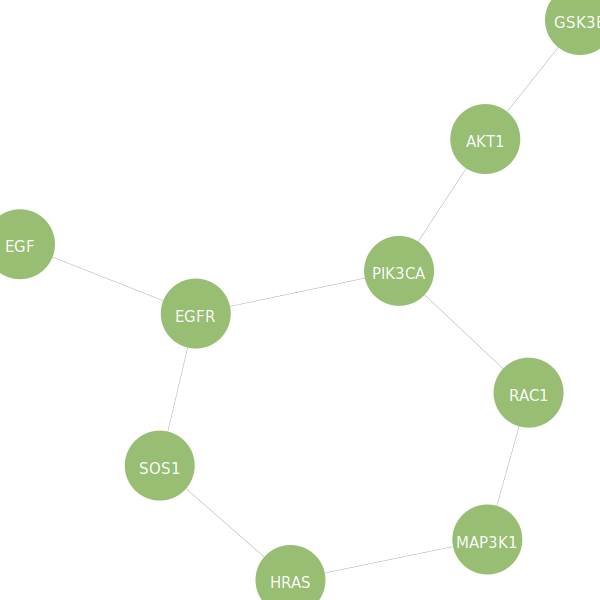

In [3]:
import igraph
plot = igraph.plot(pa.graph, target = 'egf_network.png',
            edge_width = 0.3, edge_color = '#777777',
            vertex_color = '#97BE73', vertex_frame_width = 0,
            vertex_size = 70.0, vertex_label_size = 15,
            vertex_label_color = '#FFFFFF',
            # due to a bug in either igraph or IPython, 
            # vertex labels are not visible on inline plots:
            inline = False)

from IPython.display import Image
Image(filename='egf_network.png')

4: Querying the PyPath object
-----------------------------
This object offers many methods for analysing the network and also for integrating additional data. Let's see some examples. List those proteins stimulating the protein PIK3CA:

In [4]:
list(pa.gs_stimulated_by('PIK3CA').gs())

	:: Setting directions: finished, 100.0% [0:00:00 elapsed]


['EGFR']

And those stimulated by PIK3CA:

In [5]:
list(pa.gs_stimulates('PIK3CA').gs())

['AKT1', 'RAC1']

In the background in order to run these queries, pypath converted the network to a directed graph:

In [7]:
import sys
# the original, undirected igraph object:
sys.stdout.write('pa.graph is directed: %s\n' % pa.graph.is_directed())
# the directed one:
sys.stdout.write('pa.dgraph is directed: %s\n' % pa.dgraph.is_directed())

pa.graph is directed: False
pa.dgraph is directed: True


5: Loading more data
--------------------

In [8]:
from pypath import data_formats
pa.load_resources(data_formats.pathway)

	:: Loading data from cache previously downloaded from www.uniprot.org
	:: Ready. Resulted `plain text` of type file object. 
	:: Local file at `/home/denes/Dokumentumok/pw/dev/src/cache/ec920965677ac83b8805d72853c79d45-`.
 » DeathDomain
	:: Reading from cache: cache/deathdomain.edges.pickle
	:: Processing nodes: finished, 100.0% [0:00:00 elapsed]
	:: Processing edges: finished, 100.0% [0:00:00 elapsed]
	:: Processing attributes: finished, 100.0% [0:00:00 elapsed]
 » PDZBase
	:: Reading from cache: cache/pdzbase.edges.pickle
	:: Processing nodes: finished, 100.0% [0:00:00 elapsed]
	:: Processing edges: finished, 100.0% [0:00:00 elapsed]
	:: Processing attributes: finished, 100.0% [0:00:00 elapsed]
 » Guide2Pharma
	:: Reading from cache: cache/guide2pharma.edges.pickle
	:: Processing nodes: finished, 100.0% [0:00:00 elapsed]
	:: Processing edges: finished, 100.0% [0:00:00 elapsed]
	:: Processing attributes: finished, 100.0% [0:00:00 elapsed]
 » SignaLink3
	:: Reading from cache: cache/s

6: Further attributes in the *PyPath* object
------------------------------------------

We just loaded pathway data from the pathway resources in OmniPath. The 2 small example networks are among the sources, the new ones have been added.

In [20]:
pa.graph.es[
    pa.get_edge('EGF', 'EGFR')
]['sources']

['SignaLink3', 'SPIKE', 'egf2', 'Signor', 'egf1']

We can also see the directions and effects of this interaction:

In [21]:
print pa.graph.es[
    pa.get_edge('EGF', 'EGFR')
]['dirs']

Directions and signs of interaction between P00533 and P01133

	P00533 <=== P01133 :: SPIKE, SignaLink3, egf2, Signor, egf1
	P00533 ==== P01133 :: egf2, egf1
	P00533 <=+= P01133 :: SignaLink3, egf2, Signor, SPIKE
	P00533 <=-= P01133 :: egf1



As we see, the first example network wrongly had EGF inhibiting EGFR.

But what is ``gs()``? It is a shorthand for ``genesymbol()``, facilitating querying the object by human readable names. Let's see what other stimulators 'PIK3CA' has now based on all the resources above.

In [35]:
pa.dgraph = None # to remove the old directed graph and get a new one
print list(pa.gs_stimulated_by('PIK3CA').gs())

['EGFR', 'HRAS', 'IGF1R', 'ERBB4', 'ERBB2', 'NTRK1', 'PTPN11', 'IRS1', 'NRAS', 'KRAS', 'PIK3R3', 'GNGT1', 'GRB10', 'IRS2', 'GAB2', 'SRC', 'SHC1', 'TNF', 'ITGB4', 'GAB1', 'ERBB3', 'PIK3AP1', 'GNB1', 'GNG3', 'GNG2', 'GNG12', 'GNB3']


And its inhibitors:

In [28]:
list(pa.gs_inhibited_by('PIK3CA').gs())

['CBLB', 'GNA11']

The ``gs_`` in front means we query by GeneSymbol, this returns a special ``VertexSeq`` object:

In [29]:
pa.gs_inhibited_by('PIK3CA')

It's possible to get generators to iterate this vertex sequence, for example by GeneSymbols:

In [30]:
pa.gs_inhibited_by('PIK3CA').gs()

<generator object genesymbol at 0x7f1a1c25ba50>

Or by UniProt IDs:

In [31]:
list(pa.gs_inhibited_by('PIK3CA').up())

['Q13191', 'P29992']

Or by ``igraph.Vertex`` objects:

In [32]:
list(pa.gs_inhibited_by('PIK3CA').vs())

[igraph.Vertex(<igraph.Graph object at 0x7f1a2573dde0>,673,{'g2p_receptor': False, 'nameType': 'uniprot', 'originalNames': {'Q13191': 'uniprot'}, 'name': 'Q13191', 'ncbi_tax_id': 9606, 'color': '#49969AAA', 'type': 'protein', 'ca1_location': 'Cytosol', 'label': 'CBLB', 'sources': ['SignaLink3', 'CA1', 'Signor'], 'references': [<pypath.input_formats.Reference object at 0x7f1a1cb57a10>, <pypath.input_formats.Reference object at 0x7f1a22f32750>, <pypath.input_formats.Reference object at 0x7f1a144cb950>, <pypath.input_formats.Reference object at 0x7f1a22f327d0>, <pypath.input_formats.Reference object at 0x7f1a14e8a910>, <pypath.input_formats.Reference object at 0x7f1a22f32650>, <pypath.input_formats.Reference object at 0x7f1a240112d0>, <pypath.input_formats.Reference object at 0x7f1a19ee0110>, <pypath.input_formats.Reference object at 0x7f1a185f6350>, <pypath.input_formats.Reference object at 0x7f1a22f32710>, <pypath.input_formats.Reference object at 0x7f1a1c6bd750>, <pypath.input_formats.

``affects`` and ``affected_by`` methods query the molecules affected by or having an effect on the target respectively, either stimulation, inhibition or unknown effect:

In [34]:
print list(pa.gs_affects('EGFR').gs())

['SOS1', 'PIK3CA', 'ERBB2', 'ANXA1', 'STAT3', 'NCK1', 'CLTA', 'SHC2', 'VAV2', 'SFN', 'ALCAM', 'GRAP', 'PTPN11', 'CASP1', 'FOS', 'SLC3A2', 'ESR1', 'S100A7', 'CASP3', 'HOXC10', 'SHC3', 'PTK2', 'TUBA1A', 'CAV2', 'CAV1', 'ICAM1', 'GRB2', 'GAPDH', 'ATP1A1', 'ATP1B1', 'GSTP1', 'STAT5A', 'STAT1', 'LYN', 'CBL', 'ERRFI1', 'S100A9', 'CDH1', 'HGS', 'PIK3R1', 'PLCG1', 'JAK1', 'MAP2K1', 'CASP7', 'NCK2', 'E2F1', 'EZR', 'STAT5B', 'SHC1', 'PTPN1', 'CCND1', 'MUC1', 'SEC13', 'LRIG1', 'PTK2B', 'GAB1', 'SOCS5', 'ERBB3', 'CALM2', 'WASF1', 'PKIA', 'PRKDC', 'EPB41', 'RGS16', 'HDAC6', 'PCNA', 'TRPV3', 'EPS15', 'PIK3C2B']


Those proteins affecting EGFR; we see EGF among them:

In [36]:
print list(pa.gs_affected_by('EGFR').gs())

['EGF', 'ERBB2', 'RARA', 'AREGB', 'STAT3', 'BTC', 'TLR2', 'PTPN2', 'SOCS4', 'VAV2', 'TP53', 'PKN1', 'PTPN11', 'CBLB', 'CASP1', 'MAPK1', 'ABL1', 'MAPK11', 'TLR4', 'AP2M1', 'CAV1', 'EGR1', 'STAT1', 'CDK1', 'PRKCA', 'CBL', 'ERRFI1', 'JAK1', 'MAPK3', 'TGFA', 'JAK2', 'SRC', 'HBEGF', 'SNX9', 'PTPN6', 'PTPN1', 'MUC1', 'RIN1', 'LRIG1', 'PTK2B', 'ITGB4', 'SOCS5', 'MAPK14', 'MMP2', 'JUNB', 'EREG', 'GPER1', 'EPN1', 'EPGN']


The direct neighbors, without being aware of the directions are retrieved by ``neighbors`` methods:

In [37]:
print list(pa.gs_neighbors('EGFR').gs())

['SOS1', 'PIK3CA', 'EGF', 'ERBB4', 'ERBB2', 'ANXA1', 'RASA1', 'RARA', 'AREGB', 'STAT3', 'NCK1', 'BTC', 'CLTA', 'TLR2', 'PTPN2', 'SHC2', 'SOCS4', 'VAV2', 'TP53', 'PKN1', 'SFN', 'ALCAM', 'GRAP', 'PTPN11', 'CBLB', 'CASP1', 'MAPK1', 'FOS', 'SLC3A2', 'ESR1', 'S100A7', 'ABL1', 'CASP3', 'HOXC10', 'SHC3', 'PTK2', 'MAPK11', 'TLR4', 'TUBA1A', 'CAV2', 'AP2M1', 'CAV1', 'ICAM1', 'GRB2', 'EGR1', 'GAPDH', 'ATP1A1', 'ATP1B1', 'GSTP1', 'STAT5A', 'STAT1', 'LYN', 'CDK1', 'PRKCA', 'CBL', 'ERRFI1', 'S100A9', 'GRB7', 'CDH1', 'HGS', 'PIK3R1', 'PLCG1', 'JAK1', 'MAP2K1', 'MAPK3', 'TGFA', 'JAK2', 'SRC', 'HBEGF', 'CASP7', 'NCK2', 'E2F1', 'SNX9', 'EZR', 'STAT5B', 'SHC1', 'PTPN6', 'PTPN1', 'CCND1', 'MUC1', 'RIN1', 'SEC13', 'LRIG1', 'CRK', 'PTK2B', 'ITGB4', 'GAB1', 'SOCS5', 'MAPK14', 'ERBB3', 'CALM2', 'WASF1', 'PKIA', 'PRKDC', 'EPB41', 'MMP2', 'CBLC', 'RGS16', 'JUNB', 'HDAC6', 'PCNA', 'TRPV1', 'TRPV3', 'PKD2', 'EPS15', 'EREG', 'GPER1', 'PIK3C2B', 'EPN1', 'EPGN']


The ``neighborhood`` methods return the indirect neighborhood in custom number of steps (however size of the neighborhood increases rapidly with number of steps):

In [40]:
print list(pa.gs_neighborhood('EGFR').gs()) # 1 step by default
print ""
print list(pa.gs_neighborhood('EGFR', 2).gs()) # 2 steps

['EGFR', 'SOS1', 'PIK3CA', 'EGF', 'ERBB4', 'ERBB2', 'ANXA1', 'RASA1', 'RARA', 'AREGB', 'STAT3', 'NCK1', 'BTC', 'CLTA', 'TLR2', 'PTPN2', 'SHC2', 'SOCS4', 'VAV2', 'TP53', 'PKN1', 'SFN', 'ALCAM', 'GRAP', 'PTPN11', 'CBLB', 'CASP1', 'MAPK1', 'FOS', 'SLC3A2', 'ESR1', 'S100A7', 'ABL1', 'CASP3', 'HOXC10', 'SHC3', 'PTK2', 'MAPK11', 'TLR4', 'TUBA1A', 'CAV2', 'AP2M1', 'CAV1', 'ICAM1', 'GRB2', 'EGR1', 'GAPDH', 'ATP1A1', 'ATP1B1', 'GSTP1', 'STAT5A', 'STAT1', 'LYN', 'CDK1', 'PRKCA', 'CBL', 'ERRFI1', 'S100A9', 'GRB7', 'CDH1', 'HGS', 'PIK3R1', 'PLCG1', 'JAK1', 'MAP2K1', 'MAPK3', 'TGFA', 'JAK2', 'SRC', 'HBEGF', 'CASP7', 'NCK2', 'E2F1', 'SNX9', 'EZR', 'STAT5B', 'SHC1', 'PTPN6', 'PTPN1', 'CCND1', 'MUC1', 'RIN1', 'SEC13', 'LRIG1', 'CRK', 'PTK2B', 'ITGB4', 'GAB1', 'SOCS5', 'MAPK14', 'ERBB3', 'CALM2', 'WASF1', 'PKIA', 'PRKDC', 'EPB41', 'MMP2', 'CBLC', 'RGS16', 'JUNB', 'HDAC6', 'PCNA', 'TRPV1', 'TRPV3', 'PKD2', 'EPS15', 'EREG', 'GPER1', 'PIK3C2B', 'EPN1', 'EPGN']

['EGFR', 'SOS1', 'PIK3CA', 'EGF', 'ERBB4', '

7: Accessing the literature references
--------------------------------------
References are listed in the ``references`` edge attribute:

In [49]:
edge = pa.graph.es[
    pa.get_edge('EGF', 'EGFR')
]
refs = edge['references']

print refs

[<pypath.input_formats.Reference object at 0x7f1a19b52350>, <pypath.input_formats.Reference object at 0x7f1a143d6410>, <pypath.input_formats.Reference object at 0x7f1a1436a350>, <pypath.input_formats.Reference object at 0x7f1a177972d0>]


Each reference has its PubMed ID:

In [45]:
refs[0].pmid

'2186024'

To open in a browser just call ``open()``:

In [ ]:
refs[0].open()

It's possible to know which resources cite which papers:

In [50]:
edge['refs_by_source']

{'SPIKE': [<pypath.input_formats.Reference at 0x7f1a177972d0>],
 'SignaLink3': [<pypath.input_formats.Reference at 0x7f1a19b52350>],
 'Signor': [<pypath.input_formats.Reference at 0x7f1a143d6410>,
 'egf1': [],
 'egf2': []}

8: *Direction* objects
--------------------
Each edge stores its direction and effect sign data in one ``Direction`` object:

In [62]:
edge['dirs']

Also there are ways to query the direction and effect information by resources:

In [53]:
dirs = edge['dirs']
dirs.get_dir(dirs.reverse, sources = True)

{'SPIKE', 'SignaLink3', 'Signor', 'egf1', 'egf2'}

``reverse`` means an arbitrary direction, noted as a tuple of UniProt IDs, where UniProt ID #1 affects UniProt ID #2; ``straight`` is its opposite, and ``undirected`` means unknown direction:

In [57]:
print dirs.reverse
print dirs.straight

('P01133', 'P00533')
('P00533', 'P01133')


By default, ``get_dirs()`` returns boolean values:

In [60]:
dirs.get_dir(dirs.reverse)

True

The same way effect signs can be queried. A pair of boolean values means if the interaction is stimulation and if it is inhibition, respectively.

In [61]:
dirs.get_sign(dirs.reverse)

[True, True]